In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from my_functions_for_ml import *

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
import pandas as pd
import glob

# List all CSV files in the folder (adjust the path as needed)
# files = glob.glob("MachineLearningCVE/*.csv")

# List of CSVs to combine (customize as needed)
files = [
    "MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",
    "MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv"
]

# Read and concatenate
df_list = [pd.read_csv(f) for f in files]
combined_df = pd.concat(df_list, ignore_index=True)  # preserves columns and stacks rows :contentReference[oaicite:2]{index=2}

print("Combined shape:", combined_df.shape)

Combined shape: (1663883, 79)


In [4]:
# Combine
# df = pd.concat([ddos, benign])
df_raw = combined_df[:]

In [5]:
# Clean the column name first
df_raw.columns = df_raw.columns.str.strip()

In [6]:
print("Combine",df_raw["Label"].value_counts())

Combine Label
BENIGN                        1122038
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
DoS slowloris                    5796
DoS Slowhttptest                 5499
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [7]:
# Replace 'Label' with the actual name of your label column if it's different
df_raw['BinaryLabel'] = df_raw['Label'].apply(lambda x: 'BENIGN' if x == 'BENIGN' else 'ATTACK')

/tmp/ipykernel_1122/2241043365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['BinaryLabel'] = df_raw['Label'].apply(lambda x: 'BENIGN' if x == 'BENIGN' else 'ATTACK')


In [8]:
df_raw.sample(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,BinaryLabel
1121016,80,103778942,11,8,2028,11595,335,0,184.363636,173.080486,5792,0,1449.375000,2046.673464,1.312694e+02,0.183081,5.765497e+06,2.360000e+07,100000000,5,104000000,1.040000e+07,3.160000e+07,100000000,5,104000000,1.480000e+07,3.780000e+07,100000000,47,0,0,0,0,324,264,0.105995,0.077087,0,5792,681.450000,1405.133838,1.974401e+06,1,0,0,0,0,0,0,0,0,717.315790,184.363636,1449.375000,324,0,0,0,0,0,0,11,2028,8,11595,0,235,8,20,9018.00000,0.0000,9018,9018,1.000000e+08,0.000,100000000,100000000,DoS Hulk,ATTACK
1516223,53,31916,2,2,82,632,41,41,41.000000,0.000000,316,316,316.000000,0.000000,2.237122e+04,125.328989,1.063867e+04,1.842065e+04,31909,3,4,4.000000e+00,0.000000e+00,4,4,3,3.000000e+00,0.000000e+00,3,3,0,0,0,0,64,64,62.664494,62.664494,41,316,151.000000,150.623703,2.268750e+04,0,0,0,0,0,0,0,0,1,188.750000,41.000000,316.000000,64,0,0,0,0,0,0,2,82,2,632,-1,-1,1,32,0.00000,0.0000,0,0,0.000000e+00,0.000,0,0,BENIGN,BENIGN
1188584,80,99914919,6,6,378,11595,360,0,63.000000,145.529379,10136,0,1932.500000,4060.245892,1.198320e+02,0.120102,9.083174e+06,3.010000e+07,99700000,1,99800000,2.000000e+07,4.460000e+07,99700000,1,99900000,2.000000e+07,4.460000e+07,99800000,49,0,0,0,0,164,200,0.060051,0.060051,0,10136,921.461538,2797.720459,7.827240e+06,1,0,0,0,0,0,0,0,1,998.250000,63.000000,1932.500000,164,0,0,0,0,0,0,6,378,6,11595,0,235,3,20,12983.00000,0.0000,12983,12983,9.970000e+07,0.000,99700000,99700000,DoS Hulk,ATTACK
1037289,80,116358706,19,16,966,1158,292,0,50.842105,107.294643,384,0,72.375000,154.616461,1.825390e+01,0.300794,3.422315e+06,4.694901e+06,10000000,70,116000000,6.462337e+06,4.735922e+06,10000000,179,116000000,7.754768e+06,4.125530e+06,10100000,497,0,0,0,0,392,464,0.163288,0.137506,0,384,59.000000,127.997768,1.638343e+04,0,0,0,1,0,0,0,0,0,60.685714,50.842105,72.375000,392,0,0,0,0,0,0,19,966,16,1158,8192,1013,18,20,99485.16667,164102.3618,586383,36611,9.594020e+06,1378659.034,10000000,5219896,BENIGN,BENIGN
235556,443,5072992,8,6,390,3716,209,0,48.750000,77.135780,1460,0,619.333333,679.909014,8.093843e+02,2.759713,3.902302e+05,1.368913e+06,4945961,3,5072992,7.247131e+05,1.861572e+06,4945961,3,53291,1.065820e+04,1.340154e+04,27845,49,0,0,0,0,172,132,1.576979,1.182734,0,1460,273.733333,503.525920,2.535384e+05,0,0,0,1,0,0,0,0,0,293.285714,48.750000,619.333333,172,0,0,0,0,0,0,8,390,6,3716,8192,119,7,20,0.00000,0.0000,0,0,0.000000e+00,0.000,0,0,BENIGN,BENIGN
451301,6346,63,1,1,0,6,0,0,0.000000,0.000000,6,6,6.000000,0.000000,9.523810e+04,31746.031750,6.300000e+01,0.000000e+00,63,63,0,0.000000e+00,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,40,20,15873.015870,15873.015870,0,6,2.000000,3.464102,1.200000e+01,0,0,0,1,0,0,0,0,1,3

In [9]:
df_raw.duplicated().sum()

224530

In [10]:
df = df_raw.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

0

In [12]:
print(df['BinaryLabel'].value_counts())

BinaryLabel
BENIGN    1024580
ATTACK     414773
Name: count, dtype: int64


In [13]:
df.shape

(1439353, 80)

In [14]:
# Get total number of rows
total = len(df)

# Get label counts and percentages
label_counts = df["BinaryLabel"].value_counts()
label_percentages = (label_counts / total) * 100

# Display counts and percentages
print("Label Counts:\n", label_counts)
print("\nLabel Percentages (%):\n", label_percentages.round(2))

Label Counts:
 BinaryLabel
BENIGN    1024580
ATTACK     414773
Name: count, dtype: int64

Label Percentages (%):
 BinaryLabel
BENIGN    71.18
ATTACK    28.82
Name: count, dtype: float64


In [15]:
# from sklearn.utils import resample

# target_total = df.shape[0]
# desired_benign_ratio = 0.6
# target_benign_count = int((desired_benign_ratio / (1)) * (df['BinaryLabel'].value_counts()['ATTACK'] / (1 - desired_benign_ratio)))

# # Separate classes
# benign_df = df[df['BinaryLabel'] == 'BENIGN']
# attack_df = df[df['BinaryLabel'] == 'ATTACK']

# # Downsample BENIGN to target count
# benign_downsampled = resample(benign_df,
#                               replace=False,       # sample without replacement
#                               n_samples=target_benign_count,
#                               random_state=42)     # for reproducibility

# # Combine and shuffle
# balanced_df = pd.concat([benign_downsampled, attack_df]).sample(frac=1, random_state=42).reset_index(drop=True)

# # Check new distribution
# print(balanced_df['BinaryLabel'].value_counts(normalize=True) * 100)


In [16]:
# balanced_df.shape

In [17]:
1663883 - 1354612

309271

In [18]:
columns = df.columns

In [19]:
columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [20]:
#missing values
missing_percentage(df)

Flow Bytes/s  :  113  : [ 7.739726027397261 %]


In [21]:
# Replace common missing values
missing_values = [-1, 'NaN', 'nan', '', ' ']
df.replace(missing_values, np.nan, inplace=True)
# Drop rows with missing or infinite values
df.replace([np.inf, -np.inf], 0, inplace=True)
df.replace(-1, 0, inplace=True)
# Replace -1 with NaN in these
df[['Init_Win_bytes_forward', 'Init_Win_bytes_backward']] = df[['Init_Win_bytes_forward', 'Init_Win_bytes_backward']].replace(-1, np.nan)
df.dropna(inplace=True)

/tmp/ipykernel_1122/2707289184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(missing_values, np.nan, inplace=True)
/tmp/ipykernel_1122/2707289184.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], 0, inplace=True)
/tmp/ipykernel_1122/2707289184.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(-1, 0, inplace=True)
/tmp/ipykernel_1122/2707289184.py:8: SettingWithCopyWarning: 


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819746 entries, 1 to 1663880
Data columns (total 80 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             819746 non-null  int64  
 1   Flow Duration                819746 non-null  float64
 2   Total Fwd Packets            819746 non-null  int64  
 3   Total Backward Packets       819746 non-null  int64  
 4   Total Length of Fwd Packets  819746 non-null  int64  
 5   Total Length of Bwd Packets  819746 non-null  int64  
 6   Fwd Packet Length Max        819746 non-null  int64  
 7   Fwd Packet Length Min        819746 non-null  int64  
 8   Fwd Packet Length Mean       819746 non-null  float64
 9   Fwd Packet Length Std        819746 non-null  float64
 10  Bwd Packet Length Max        819746 non-null  int64  
 11  Bwd Packet Length Min        819746 non-null  int64  
 12  Bwd Packet Length Mean       819746 non-null  float64
 13  Bwd

In [23]:
missing_percentage(df)

In [24]:
# List of columns to drop
#Remove columns contain same/0 value for all rows
columns_to_drop = [
    'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
    'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
    'CWE Flag Count', 'Bwd URG Flags', 'Fwd URG Flags', 'Bwd PSH Flags',
    'Fwd Header Length.1','Label'
]

# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop)

# Confirm shape change
print(f"Original shape: {df.shape}")
print(f"New shape after dropping columns: {df_cleaned.shape}")


Original shape: (819746, 80)
New shape after dropping columns: (819746, 68)


In [25]:
from sklearn.preprocessing import LabelEncoder

# Separate X and y
X = df_cleaned.drop(columns=['BinaryLabel'])
y = df_cleaned['BinaryLabel']

# Encode label if not already
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Check mapping (e.g., {'BENIGN': 0, 'DDoS': 1})
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'ATTACK': 0, 'BENIGN': 1}


In [26]:
final_col = X.columns
final_col

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count'

In [27]:
columns_to_transform = [
    'Destination Port', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
    'Fwd Packet Length Max', 'Fwd Packet Length Min',
    'Fwd Packet Length Mean', 'Fwd Packet Length Std',
    'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
    'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
    'Flow IAT Min', 'Fwd IAT Mean', 'Fwd IAT Std',
    'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd IAT Std',
    'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
    'Fwd Header Length', 'Bwd Header Length',
    'Fwd Packets/s', 'Min Packet Length', 'Packet Length Variance',
    'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count',
    'URG Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
    'Avg Fwd Segment Size', 'Subflow Fwd Packets',
    'Subflow Fwd Bytes', 'Init_Win_bytes_forward',
    'Init_Win_bytes_backward', 'act_data_pkt_fwd',
    'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Std'
]


In [28]:
chunk_size = 50000
n = X.shape[0]

transformed_chunks = []
lambdas_list = []

for start in range(0, n, chunk_size):
    end = min(start + chunk_size, n)
    X_chunk = X.iloc[start:end].copy()
    # Note: ensure X_chunk does *not* include target columns like 'y'
    
    transformed_X_chunk, lambdas = Advance_column_transformer(
        X_chunk,
        columns=columns_to_transform,
        method='yeo-johnson',
        standardize=True
    )
    
    transformed_chunks.append(transformed_X_chunk)
    lambdas_list.append(lambdas)
    print("chunk - ",start," Done.")
# Reconstruct the full transformed DataFrame:
transformed_X = pd.concat(transformed_chunks, ignore_index=True)

# For simplicity, assume each chunk uses same lambdas:
lambdas_X = lambdas_list[0]


chunk -  0  Done.
chunk -  50000  Done.
chunk -  100000  Done.
chunk -  150000  Done.
chunk -  200000  Done.
chunk -  250000  Done.
chunk -  300000  Done.
chunk -  350000  Done.
chunk -  400000  Done.
chunk -  450000  Done.
chunk -  500000  Done.
chunk -  550000  Done.
chunk -  600000  Done.
chunk -  650000  Done.
chunk -  700000  Done.
chunk -  750000  Done.
chunk -  800000  Done.


In [29]:
import numpy as np
import pandas as pd

def cap_outliers_iqr_chunkwise(df, chunk_size=50000, inplace=False):
    """
    Applies IQR-based outlier capping in chunks to reduce memory usage.
    Returns a new capped DataFrame by default.
    """
    df_out = [] if not inplace else None

    n = df.shape[0]
    for start in range(0, n, chunk_size):
        end = min(start + chunk_size, n)
        chunk = df.iloc[start:end].copy()

        # Apply capping per-column
        for col in chunk.select_dtypes(include=[np.number]).columns:
            Q1 = chunk[col].quantile(0.25)
            Q3 = chunk[col].quantile(0.75)
            IQR = Q3 - Q1

            if IQR == 0 or pd.isna(IQR):
                continue  # skip constant or empty columns

            low, high = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
            chunk[col] = chunk[col].clip(lower=low, upper=high)
        if inplace:
            df.iloc[start:end] = chunk.values
        else:
            df_out.append(chunk)
            
        print("chunk - ",start," Done.")
    if not inplace:
        return pd.concat(df_out, ignore_index=True)

X_fin_capped = cap_outliers_iqr_chunkwise(transformed_X, chunk_size=50000, inplace=False)

chunk -  0  Done.
chunk -  50000  Done.
chunk -  100000  Done.
chunk -  150000  Done.
chunk -  200000  Done.
chunk -  250000  Done.
chunk -  300000  Done.
chunk -  350000  Done.
chunk -  400000  Done.
chunk -  450000  Done.
chunk -  500000  Done.
chunk -  550000  Done.
chunk -  600000  Done.
chunk -  650000  Done.
chunk -  700000  Done.
chunk -  750000  Done.
chunk -  800000  Done.


In [30]:
X_fin_capped.shape

(819746, 67)

# Devide into multiple views

In [47]:
# -------------------------------------------
# Full Multiview Feature Grouping for CICIDS2017
# Each view has 3–4+ semantically similar columns
# Suitable for MCCA, multiview classifiers, etc.
# -------------------------------------------

# 🔹 View 1: Flow Meta Info
# General statistics about the network flow.
view_1 = [
    'Flow Duration',               # Duration of the entire flow
    'Flow Bytes/s',                # Byte rate
    'Flow Packets/s',             # Packet rate
    'Down/Up Ratio'               # Ratio of downstream to upstream packets
]

# 🔹 View 2: Basic Packet Count
# Count of packets in forward/backward directions.
view_2 = [
    'Total Fwd Packets',          # # of packets sent forward
    'Total Backward Packets',     # # of packets sent backward
    'Fwd Packets/s',              # Forward packet rate
    'Bwd Packets/s'               # Backward packet rate
]

# 🔹 View 3: Total Packet Volume
# Measures the volume of bytes transferred in each direction.
view_3 = [
    'Total Length of Fwd Packets',    # Total forward bytes
    'Total Length of Bwd Packets',    # Total backward bytes
    'act_data_pkt_fwd'                # Actual data packets in forward direction
]

# 🔹 View 4: Fwd Packet Length Statistics
# Characteristics of packet lengths in forward direction.
view_4 = [
    'Fwd Packet Length Max',
    'Fwd Packet Length Min',
    'Fwd Packet Length Mean',
    'Fwd Packet Length Std'
]

# 🔹 View 5: Bwd Packet Length Statistics
# Characteristics of packet lengths in backward direction.
view_5 = [
    'Bwd Packet Length Max',
    'Bwd Packet Length Min',
    'Bwd Packet Length Mean',
    'Bwd Packet Length Std'
]

# 🔹 View 6: Overall Packet Size Summary
# General statistics across both directions.
view_6 = [
    'Min Packet Length',
    'Max Packet Length',
    'Packet Length Mean',
    'Packet Length Std',
    'Packet Length Variance'
]

# 🔹 View 7: Segment-Level Averages
# More abstract measures of data chunk sizes.
view_7 = [
    'Average Packet Size',
    'Avg Fwd Segment Size',
    'Avg Bwd Segment Size'
]

# 🔹 View 8: Flow-Level Inter-Arrival Times
# Time between packets (all directions).
view_8 = [
    'Flow IAT Mean', 'Flow IAT Std',
    'Flow IAT Max', 'Flow IAT Min'
]

# 🔹 View 9: Fwd Inter-Arrival Time Features
# IAT characteristics specific to forward direction.
view_9 = [
    'Fwd IAT Total', 'Fwd IAT Mean',
    'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min'
]

# 🔹 View 10: Bwd Inter-Arrival Time Features
# IAT characteristics specific to backward direction.
view_10 = [
    'Bwd IAT Total', 'Bwd IAT Mean',
    'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min'
]

# 🔹 View 11: TCP Control Flags
# Indicates type of TCP interactions and behavior.
view_11 = [
    'Fwd PSH Flags',               # PUSH flag in forward direction
    'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count',
    'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'ECE Flag Count'
]

# 🔹 View 12: Header & TCP Window Info
# Protocol-level packet structure.
view_12 = [
    'Fwd Header Length', 'Bwd Header Length',
    'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'min_seg_size_forward'
]

# 🔹 View 13: Subflow Behavior
# Metrics from TCP-like stream segments.
view_13 = [
    'Subflow Fwd Packets', 'Subflow Fwd Bytes',
    'Subflow Bwd Packets', 'Subflow Bwd Bytes'
]

# 🔹 View 14: Active and Idle Times
# Measures of session pauses or bursts, good for DoS detection.
view_14 = [
    'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

# 👉 Combine all views into one list for multiview modeling
views = [
    view_1, view_2, view_3,
    view_4, view_5, view_6, view_7,
    view_8, view_9, view_10,
    view_11, view_12, view_13, view_14
]

# ✅ Extract views from DataFrame (assuming df is cleaned and preprocessed)
# X_views = [X[cols].copy() for cols in views]
X_views = [X_fin_capped[cols].copy() for cols in views]

In [48]:
# Optional: Print view shapes
for i, v in enumerate(X_views):
    print(f"✅ View {i+1}: {len(v.columns)} features — Shape: {v.shape}")

✅ View 1: 4 features — Shape: (819746, 4)
✅ View 2: 4 features — Shape: (819746, 4)
✅ View 3: 3 features — Shape: (819746, 3)
✅ View 4: 4 features — Shape: (819746, 4)
✅ View 5: 4 features — Shape: (819746, 4)
✅ View 6: 5 features — Shape: (819746, 5)
✅ View 7: 3 features — Shape: (819746, 3)
✅ View 8: 4 features — Shape: (819746, 4)
✅ View 9: 5 features — Shape: (819746, 5)
✅ View 10: 5 features — Shape: (819746, 5)
✅ View 11: 8 features — Shape: (819746, 8)
✅ View 12: 5 features — Shape: (819746, 5)
✅ View 13: 4 features — Shape: (819746, 4)
✅ View 14: 8 features — Shape: (819746, 8)


In [49]:
# from sklearn.model_selection import train_test_split

# # Split once to get the indices
# train_idx, test_idx = train_test_split(
#     np.arange(len(y)), test_size=0.2, stratify=y, random_state=42
# )

# # Consistently apply the split to all views
# X_views_train = [view[train_idx] for view in X_views]
# X_views_test = [view[test_idx] for view in X_views]

# # Also split y using the same indices
# y_train = y[train_idx]
# y_test = y[test_idx]


In [50]:
from mvlearn.embed import MCCA
import numpy as np

from mvlearn.embed import MCCA
mvcca = MCCA(n_components=3, regs=1e-3)  # You can try 1e-4 or 1e-2 as well
views_transformed = mvcca.fit_transform(X_views)

In [51]:
# Print transformed shapes
for i, view in enumerate(views_transformed, 1):
    print(f"View {i} shape after MCCA: {view.shape}")


View 1 shape after MCCA: (819746, 3)
View 2 shape after MCCA: (819746, 3)
View 3 shape after MCCA: (819746, 3)
View 4 shape after MCCA: (819746, 3)
View 5 shape after MCCA: (819746, 3)
View 6 shape after MCCA: (819746, 3)
View 7 shape after MCCA: (819746, 3)
View 8 shape after MCCA: (819746, 3)
View 9 shape after MCCA: (819746, 3)
View 10 shape after MCCA: (819746, 3)
View 11 shape after MCCA: (819746, 3)
View 12 shape after MCCA: (819746, 3)
View 13 shape after MCCA: (819746, 3)
View 14 shape after MCCA: (819746, 3)


In [52]:
# Combine all views into a single matrix
X_mcca = np.concatenate(views_transformed, axis=1)

In [53]:
X_mcca.shape

(819746, 42)

In [54]:
from sklearn.model_selection import train_test_split
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_mcca, y_encoded, test_size=0.2, random_state=42)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((655796, 42), (163950, 42), (655796,), (163950,))

In [56]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
# Reshape to 3D: (samples, timesteps=1, features)
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define model
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[1]), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model
history = model.fit(
    X_train_lstm, y_train,
    validation_data=(X_test_lstm, y_test),
    epochs=20,
    batch_size=1024,
    callbacks=[early_stop]
)


/home/parvez/Notebook_GPU/jupyter_gpu/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5832 - loss: 0.6752 - val_accuracy: 0.8465 - val_loss: 0.4219
Epoch 2/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8530 - loss: 0.3643 - val_accuracy: 0.8946 - val_loss: 0.2572
Epoch 3/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9047 - loss: 0.2369 - val_accuracy: 0.9514 - val_loss: 0.1878
Epoch 4/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9450 - loss: 0.1803 - val_accuracy: 0.9540 - val_loss: 0.1571
Epoch 5/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9551 - loss: 0.1506 - val_accuracy: 0.9640 - val_loss: 0.1350
Epoch 6/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9613 - loss: 0.1325 - val_accuracy: 0.9692 - val_loss: 0.1263
Epoch 7/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9644 - loss: 0.1237 - val_accuracy: 0.9439 - val_loss: 0.1383
Epoch 8/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9662 - loss: 0.1178 - val_accuracy: 

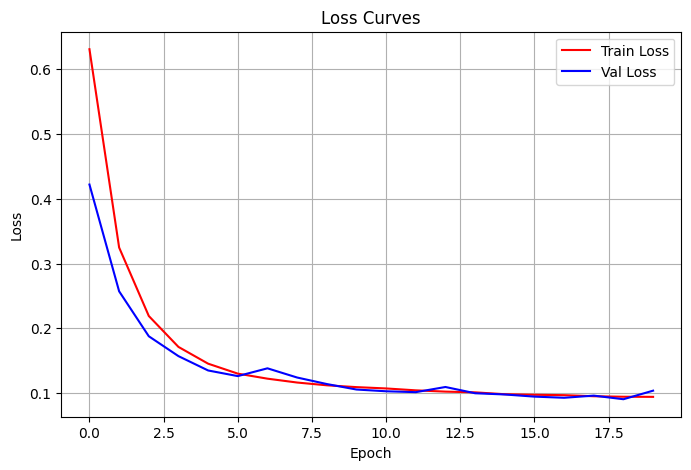

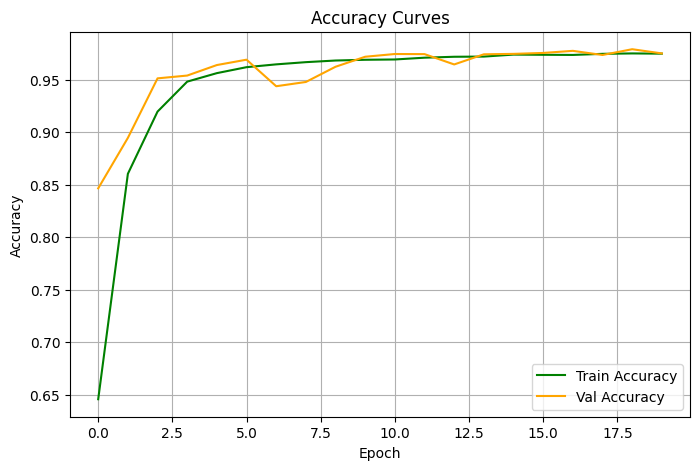

In [58]:
import matplotlib.pyplot as plt

# Plot Loss Curves
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Val Loss', color='blue')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy Curves
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='orange')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
train_loss, train_accuracy = model.evaluate(X_train_lstm, y_train, verbose=1)
print(f"\n✅ Train Accuracy: {train_accuracy:.4f}")
print(f"❌ Train Loss: {train_loss:.4f}")# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test_lstm, y_test, verbose=1)
print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")
print(f"❌ Test Loss: {test_loss:.4f}")

20494/20494 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - accuracy: 0.9797 - loss: 0.0890

✅ Train Accuracy: 0.9793
❌ Train Loss: 0.0898
5124/5124 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9791 - loss: 0.0916

✅ Test Accuracy: 0.9791
❌ Test Loss: 0.0906


5124/5124 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


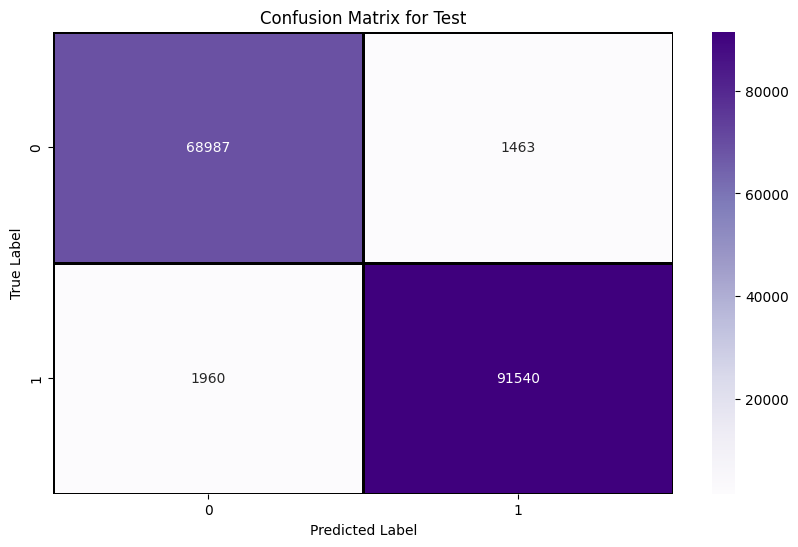

In [60]:
def binary_confusion_plot(y_test,y_pred_r_test):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    # Plot confusion matrix using seaborn heatmap
    cm = confusion_matrix(y_test, y_pred_r_test)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Purples",linewidths=1, linecolor='black',
                xticklabels=['0', '1'], 
                yticklabels=['0', '1'])
    plt.title('Confusion Matrix for Test')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
# Predict on test data
y_pred_prob = model.predict(X_test_lstm)
# For binary classification (0 or 1), convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)
binary_confusion_plot(y_test,y_pred)

20494/20494 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step


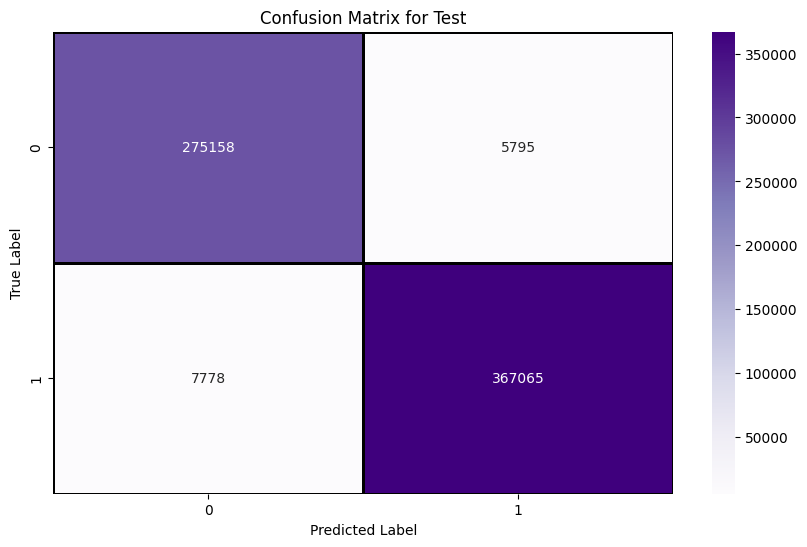

In [62]:
# Predict on test data
y_pred_prob_t = model.predict(X_train_lstm)
# For binary classification (0 or 1), convert probabilities to class labels
y_pred_t = (y_pred_prob_t > 0.5).astype(int)
binary_confusion_plot(y_train,y_pred_t)

In [63]:
# Step 6: Evaluate
loss, accuracy = model.evaluate(X_test_lstm, y_test)
y_pred_prob = model.predict(X_test_lstm)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Step 7: Report
print("Accuracy:", accuracy)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["BENIGN", "ATTACK"]))


5124/5124 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9791 - loss: 0.0916
5124/5124 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
Accuracy: 0.9791216850280762

Classification Report:

              precision    recall  f1-score   support

      BENIGN       0.97      0.98      0.98     70450
      ATTACK       0.98      0.98      0.98     93500

    accuracy                           0.98    163950
   macro avg       0.98      0.98      0.98    163950
weighted avg       0.98      0.98      0.98    163950

